## Table of Content

<div style="margin-top:20px"> 

1. [Importing Libraries](#import)
2. [Fetching Data](#fetch)
3. [Waffle Charts](#waffle)
4. [Word Clouds](#word)
5. [Plotting with Seaborn](#seaborn)
6. [Regression Plot](#regression)

</div>

## Importing Libraries <a id="import"></a>

In [135]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline

mpl.style.use('ggplot')

import pandas as pd
import numpy as np
from PIL import Image

# !pip install wordcloud seaborn

import seaborn as sns
import wordcloud

import warnings
warnings.filterwarnings('ignore')

In [14]:
print ('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.7.2
Seaborn version:  0.12.2
WordCloud version:  1.9.3


## Fetching Data <a id="fetch"></a>

In [17]:
df = pd.read_csv("Migration.csv")
df.set_index("Unnamed: 0", inplace=True)
df.index.name = None

In [19]:
df.head(3)

Continent           Region          Developed?  1980  1981  1982  \
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   
Algeria        Africa  Northern Africa  Developing regions    80    67    71   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   
Albania         0     0     0     1  ...  1223   856   702   560   716   561   
Algeria        69    63    44    69  ...  3626  4807  3623  4005  5393  4752   

             2011  2012  2013  total  
Afghanistan  2203  2635  2004  58639  
Albania       539   620   603  15699  
Algeria      4325  3774  4331  69439  

[3 rows x 38 columns]

## Waffle Charts <a id="waffle"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [258]:
dfx = df.loc[['Norway', 'Sweden', 'Denmark']]
dfx

Continent           Region         Developed?  1980  1981  1982  1983  \
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   
Denmark    93    73    93  ...    62   101    97   108    81    92    93   

         2012  2013  total  
Norway     53    59   2327  
Sweden    140   140   5866  
Denmark    94    81   3901  

[3 rows x 38 columns]

In [82]:
# Determine the proportion of each category with respect to total
cate_proportion = dfx['total'] / dfx['total'].sum()
pd.DataFrame({'Proportion': cate_proportion})

Proportion
Norway     0.192409
Sweden     0.485034
Denmark    0.322557

In [83]:
# Define overall size of the waffle chart
width = 40
height = 10

total_tiles = width*height
total_tiles

400

In [84]:
# Use the proportion of each category to determine the number of 
# tiles per category
tiles_per_category = (cate_proportion * total_tiles).round().astype(int)
# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

Number of tiles
Norway                77
Sweden               194
Denmark              129

In [86]:
# Create a matrix that represents the waffle chart and populate it.
waffle_chart = np.zeros((height, width), dtype = np.uint)

category_index = 0
tile_index = 0

# print(np.sum(tiles_per_cat[0:category_index]))

for col in range(width):
    for row in range(height):
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1

        waffle_chart[row, col] = category_index

print("Waffle Chart Populated!")

Waffle Chart Populated!


In [87]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 

<Figure size 640x480 with 0 Axes>

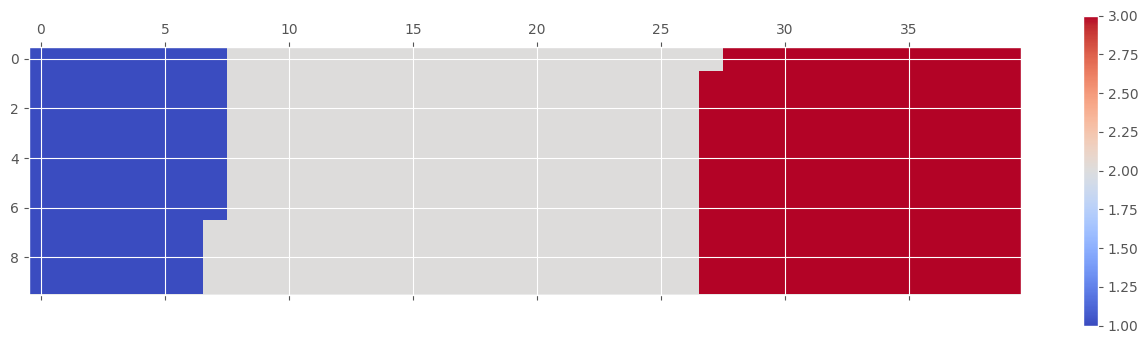

In [95]:
# Instantiating a figure object
fig = plt.figure();

colormap = plt.cm.coolwarm

plt.matshow(waffle_chart, cmap=colormap);
plt.colorbar();

<Figure size 640x480 with 0 Axes>

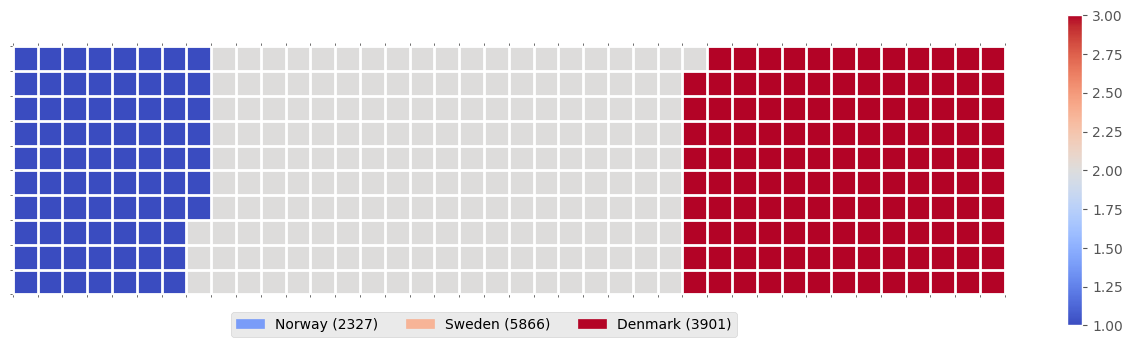

In [106]:
# Let's make the chart visually attractive and beautiful!

fig = plt.figure();

colormap = plt.cm.coolwarm

plt.matshow(waffle_chart, cmap=colormap);
plt.colorbar();

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which="minor", color="w", linestyle='-', lw=2)

plt.xticks([]);
plt.yticks([]);

# Let's create a legend and add it to the chart!

values_cumsum = np.cumsum(dfx['total'])
total_val = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []

for i, category in enumerate(dfx.index.values):
    str_label = category + ' (' + str(dfx['total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_val)
    legend_handles.append(mpatches.Patch(color = color_val, label = str_label))

# Add the legend to the chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol = len(dfx.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))

In [110]:
# Let's create a function to draw the waffle chart
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (dfx.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
Norway: 77
Sweden: 194
Denmark: 129


<Figure size 640x480 with 0 Axes>

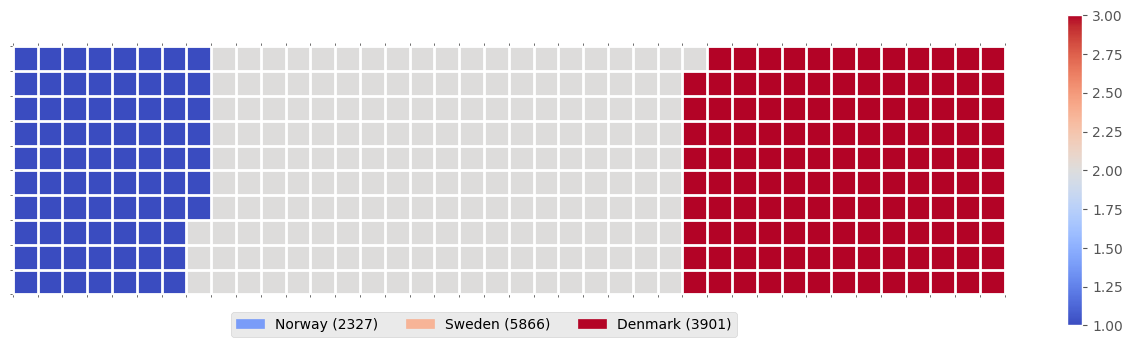

In [111]:
width = 40 # width of chart
height = 10 # height of chart

categories = dfx.index.values # categories
values = dfx['total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

This is good to understand the backend of how the waffle chart is actually being made. However, python mostly doesn't allow us to write hectic long code. Almost everything is defined in a package. Right?

Let's learn about pywaffle!

In [114]:
!pip install pywaffle

from pywaffle import Waffle


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


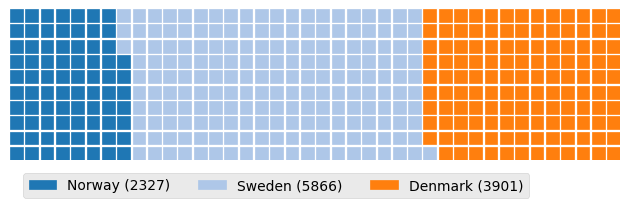

In [131]:
fig = plt.figure(FigureClass = Waffle,
                 rows=10,
                 columns=40,
                 values = dfx['total'],
                 cmap_name = 'tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(dfx.index.values, dfx.total)],
                           'loc': 'lower left',
                           'bbox_to_anchor': (0.01, -0.3, 1, 1),
                           'ncol': 3})

### Congrats! You have learnt how to create a waffle chart ðŸ§‡

## Word Clouds <a id="word"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


In [132]:
from wordcloud import WordCloud, STOPWORDS

In [136]:
%pip install --upgrade Pillow
%pip install --upgrade numpy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [166]:
import urllib
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [177]:
stopwords = set(STOPWORDS)
stopwords.update({'said', 'began', 'much', 'way'})

In [178]:
# Let's create a word cloud object
alice_wc = WordCloud()
alice_wc.generate(alice_novel)

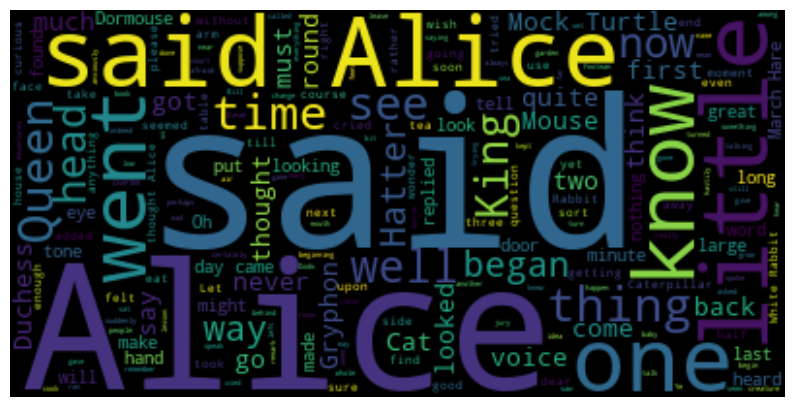

In [182]:
plt.figure(figsize=(10,6))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off');

In [170]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

(-0.5, 899.5, 899.5, -0.5)

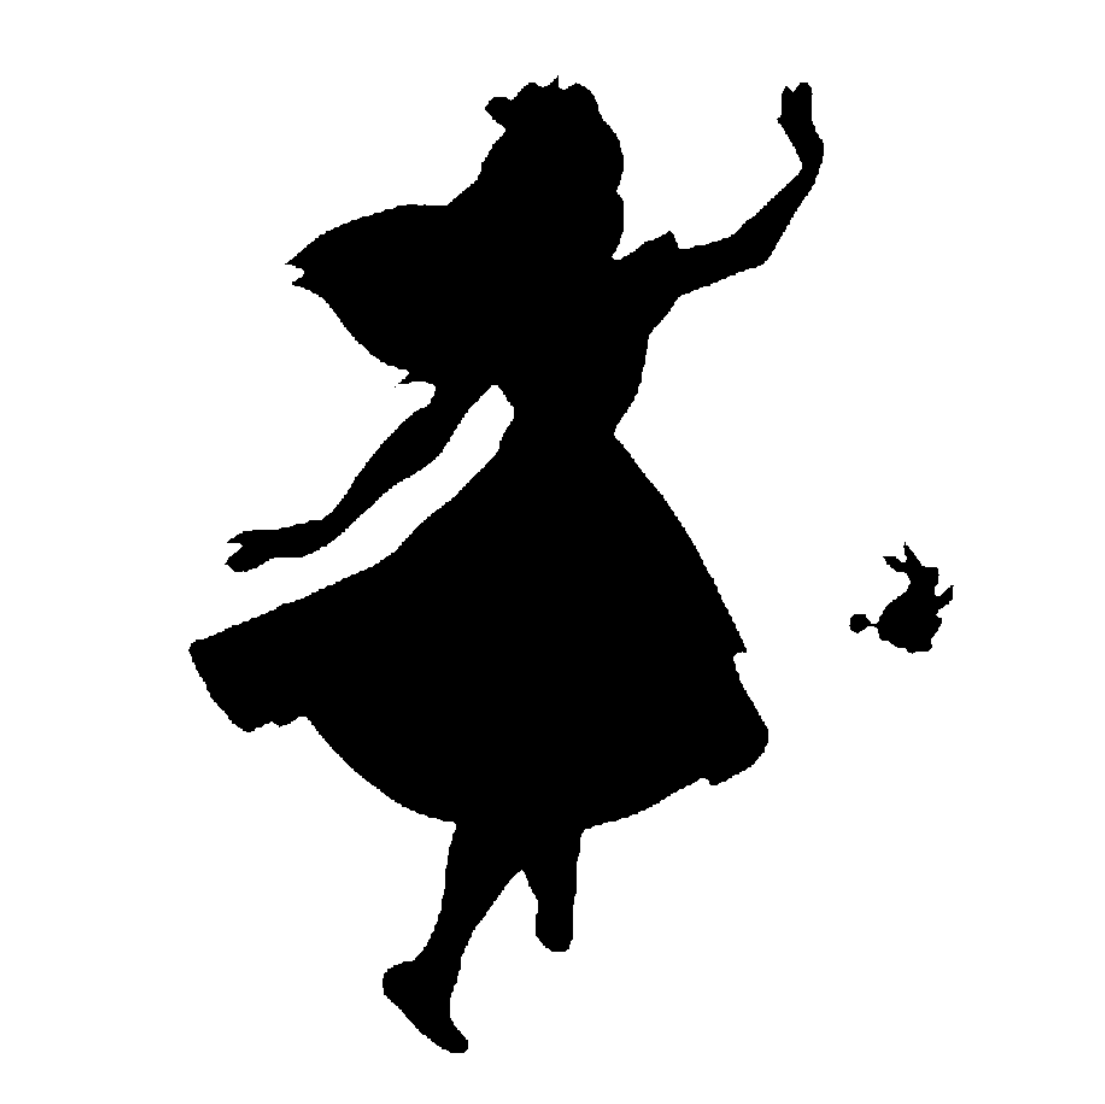

In [172]:
plt.figure(figsize=(14,18))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

(-0.5, 899.5, 899.5, -0.5)

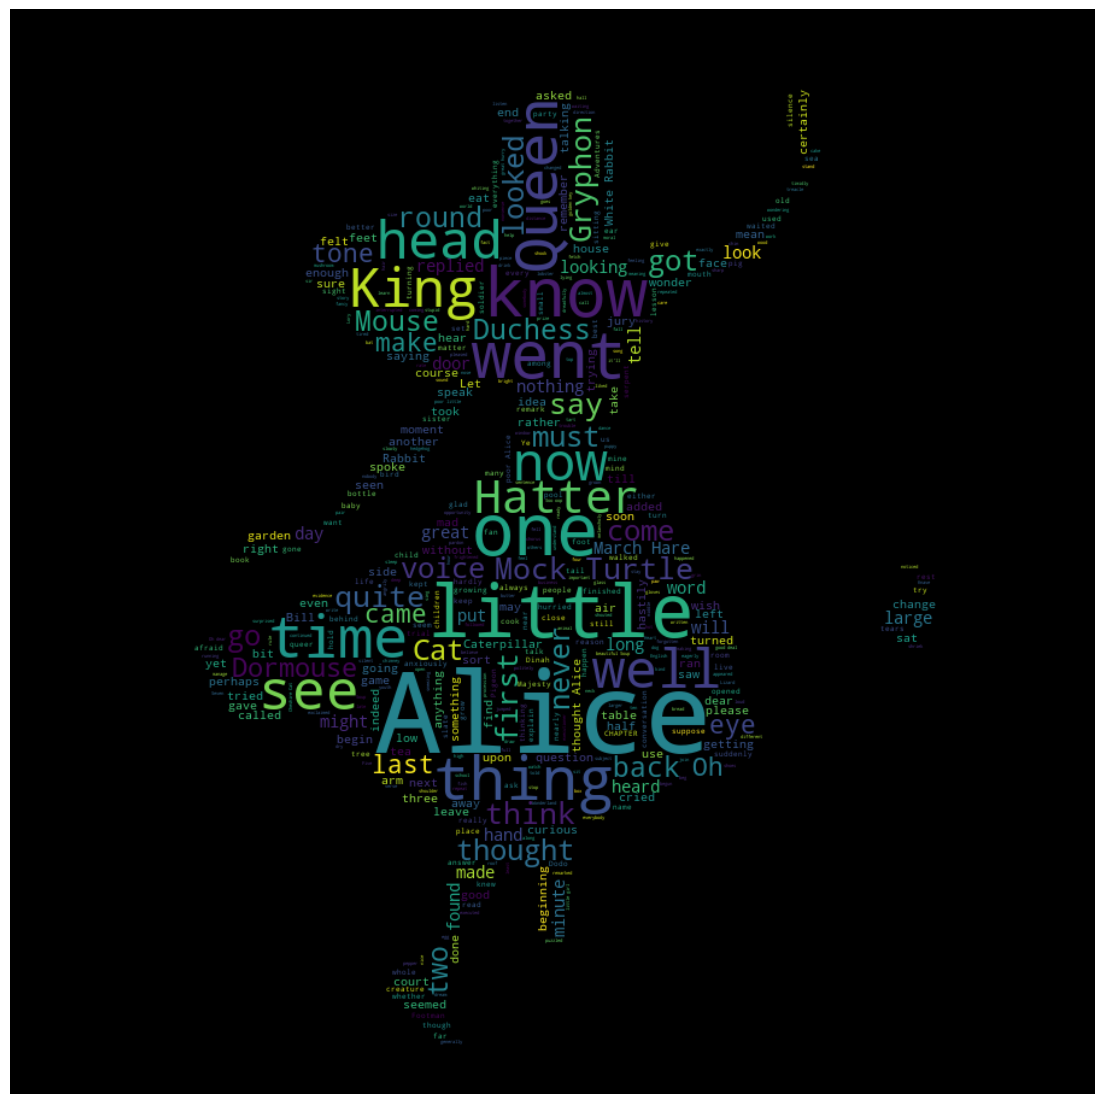

In [184]:
plt.figure(figsize=(14,18))

alice_wc = WordCloud(background_color='black', max_words=2000, mask=alice_mask, stopwords = stopwords)
alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')

## Plotting with Seaborn <a id="seaborn"></a>

In [198]:
df = df.replace({"Latin America and the Caribbean":"L-America", "Northern America":"N-America"})

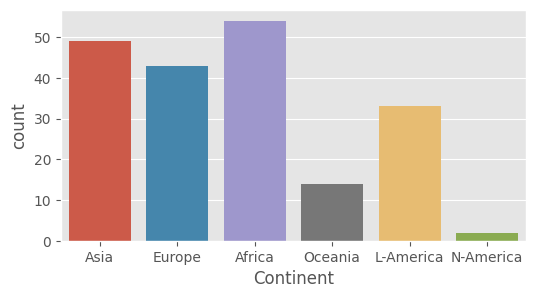

In [200]:
plt.figure(figsize=(6,3))
sns.countplot(data = df,
              x = 'Continent');

## Bar Plot

**This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals**.<br> Let's plot the total immigrants Continent-wise


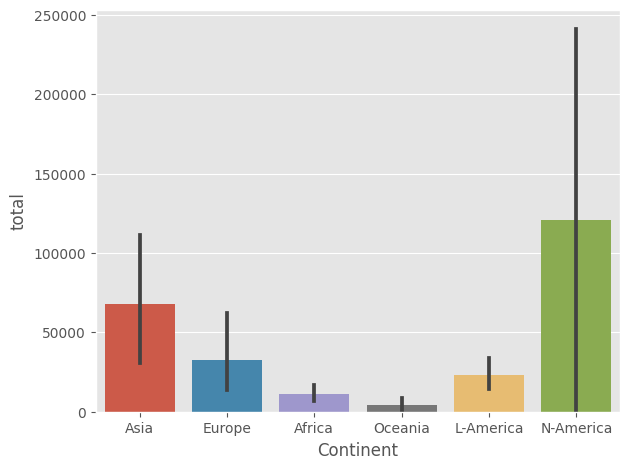

In [203]:
sns.barplot(data=df,
            x = "Continent",
            y = "total")
plt.tight_layout()

In [208]:
df[['Continent','total']].groupby("Continent").mean()

total
Continent               
Africa      11462.000000
Asia        67710.081633
Europe      32812.720930
L-America   23186.303030
N-America  120571.000000
Oceania      3941.000000

## Regression Plot <a id="regression"></a>

In [259]:
years = list(map(str, range(1980, 2014, 1)))
years[:5]

['1980', '1981', '1982', '1983', '1984']

In [217]:
tot = pd.DataFrame(df[years].sum())
tot.index = map(float, tot.index)
tot.reset_index(inplace=True)
tot.columns = ['year','total']
tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

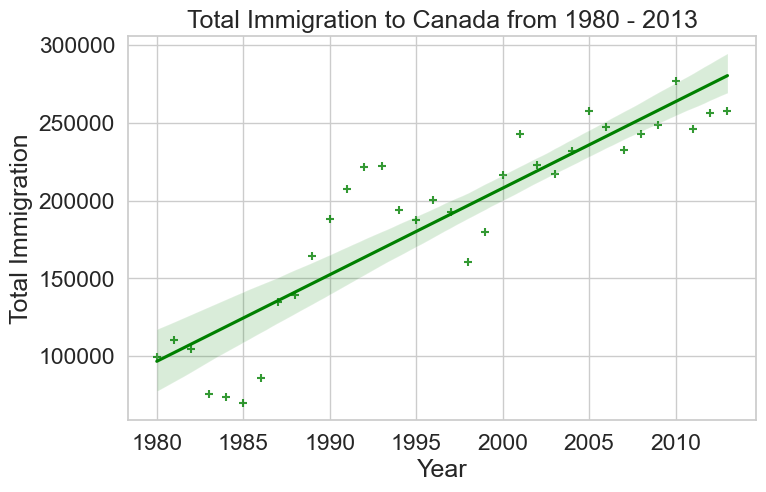

In [255]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

plt.figure(figsize=(8,5))

ax = sns.regplot(x = 'year',
            y = 'total',
            data = tot,
            color='green',
            marker = '+')

plt.tight_layout()
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

In [260]:
dfx = pd.DataFrame(dfx[years].sum())

In [261]:
dfx.index = dfx.index.map(float)
dfx.reset_index(inplace=True)
dfx.columns = ['years', 'total']

Text(0.5, 1.0, 'Total Immigration to Canada from Denmark, Norway and Sweden from 1980 to 2013')

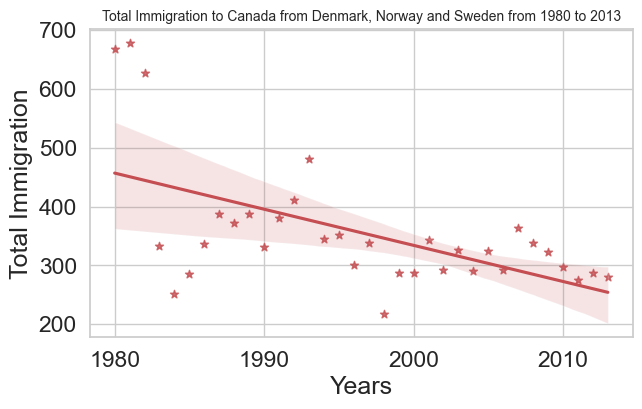

In [265]:
plt.figure(figsize=(7,4))
ax = sns.regplot(data=dfx,
            x = 'years',
            y = 'total',
            color = 'r',
            marker = '*')

ax.set(xlabel = "Years", ylabel = "Total Immigration")
ax.set_title("Total Immigration to Canada from Denmark, Norway and Sweden from 1980 to 2013", fontsize=10)

## Done!